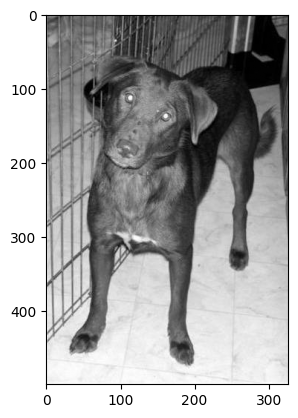

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR="D:/Work/Projects/Image-Classifier/Pet_Image"
CATEGORIES = ["Dog","Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [50]:
print(img_array)

[[227 156 121 ... 109 104 103]
 [237 158 113 ...  91  87  86]
 [233 152 107 ...  61  59  60]
 ...
 [255 253 249 ... 238 237 237]
 [255 254 251 ... 244 243 243]
 [255 255 253 ... 249 247 248]]


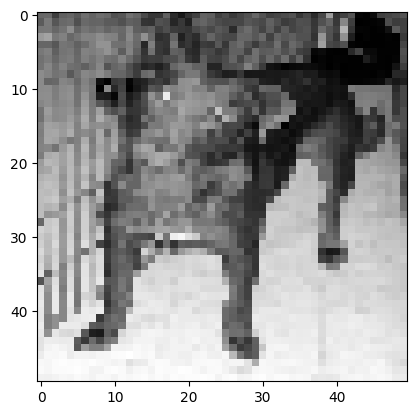

In [51]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [52]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()            

In [53]:
print(len(training_data))

8005


In [54]:
import random

random.shuffle(training_data)

In [55]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
0
1
1
0
0


In [56]:
x = []
y = []

In [57]:
for features, label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [58]:
import pickle

pickle_out = open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [59]:
pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)


In [60]:
x[1]

array([[[120],
        [ 97],
        [132],
        ...,
        [107],
        [141],
        [147]],

       [[128],
        [142],
        [154],
        ...,
        [141],
        [154],
        [118]],

       [[156],
        [123],
        [138],
        ...,
        [122],
        [109],
        [130]],

       ...,

       [[ 47],
        [ 90],
        [ 75],
        ...,
        [ 51],
        [ 49],
        [ 43]],

       [[ 84],
        [ 68],
        [106],
        ...,
        [ 52],
        [ 49],
        [ 49]],

       [[ 98],
        [ 93],
        [ 21],
        ...,
        [ 49],
        [ 52],
        [ 49]]], shape=(50, 50, 1), dtype=uint8)